**STEP 1: LOAD THE DATA**

* Load libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

* Import Dataset

In [2]:
#%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadeemajeedch/fitness-tracker-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PMLS\.cache\kagglehub\datasets\nadeemajeedch\fitness-tracker-dataset\versions\1


* Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\PMLS\.cache\kagglehub\datasets\nadeemajeedch\fitness-tracker-dataset\versions\1\gym_members_exercise_tracking_synthetic_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


**STEP 2:INSPECT THE DATA**

1. Shape: Use .shape to check the number of rows and columns.

In [4]:
df.shape

(1800, 15)

2. Columns: Use .columns to list column names. 

In [5]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

3. Info: Use .info() to examine data types and non-null counts for each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

4. Description: Use .describe() to summarize numeric columns (mean, min, max, etc.).

In [7]:
df.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


**STEP 3: Identify and Handle Missing Values**

1. Use .isnull().sum() to check the number of missing values per column.

In [8]:
df.isnull().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

2. Visualize missing data using a heatmap (sns.heatmap) to identify patterns.

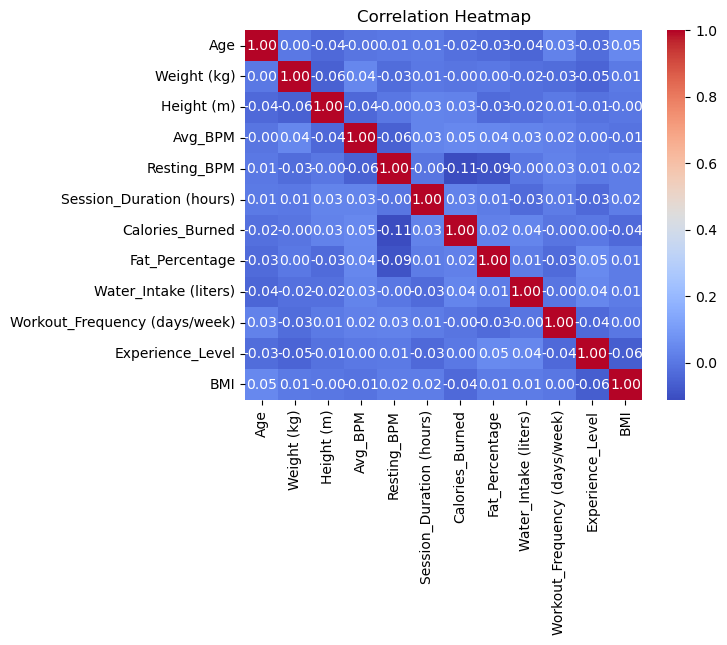

In [9]:
#plt.figure(figsize=(15, 10))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
# Using Seaborn to create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

**3. Handle missing values**

* Age, Weight (kg), Height (m), and Numeric Columns:Impute missing values using the mean or median. 

In [26]:

# Fill missing values in numeric columns with mean or median
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].median())
df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].median())
df['Resting_BPM'] = df['Resting_BPM'].fillna(df['Resting_BPM'].mean())
df['Session_Duration (hours)'] = df['Session_Duration (hours)'].fillna(df['Session_Duration (hours)'].mean())
df['Calories_Burned'] = df['Calories_Burned'].fillna(df['Calories_Burned'].mean())
df['Fat_Percentage'] = df['Fat_Percentage'].fillna(df['Fat_Percentage'].mean())

# Fill missing values in categorical columns with mode
df['Water_Intake (liters)'] = df['Water_Intake (liters)'].fillna(df['Water_Intake (liters)'].mode()[0])
df['Workout_Frequency (days/week)'] = df['Workout_Frequency (days/week)'].fillna(df['Workout_Frequency (days/week)'].mode()[0])
df['Experience_Level'] = df['Experience_Level'].fillna(df['Experience_Level'].mode()[0])

# Verify that missing values have been handled
missing_values = df.isnull().sum()
print(missing_values)



Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          7
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


Handing missing values of BMI by computing it through BMI=Weight/height^2

and missing values of MAX_BPM by max of avg_BPM

In [27]:

missing_bmi = df['BMI'].isnull()
df.loc[missing_bmi, 'BMI'] = df.loc[missing_bmi, 'Weight (kg)'] / (df.loc[missing_bmi, 'Height (m)'] ** 2)

missing_max_BPM = df['Max_BPM'].isnull()
df.loc[missing_max_BPM, 'Max_BPM'] = df['Avg_BPM'].max()
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

**Gender and Workout_Type:** 
Impute missing values using the mode (most frequent value). 

used the function of fillna to fill all the missing values with mode.

In [18]:
# Impute missing values

df['Gender'].fillna(df['Gender'].mode()[0])

df['Workout_Type'].fillna(df['Workout_Type'].mode()[0])

# Verify that missing values in these columns have been handled
df[['Gender', 'Workout_Type']].isnull().sum()


Gender          0
Workout_Type    0
dtype: int64

**Step 4: Check for Duplicates** 
1. Use .duplicated().sum() to check for duplicate rows. 
2. Remove duplicates, if any, using .drop_duplicates().

In [13]:
df.duplicated().sum()
#there are no duplicate rows in the dataset

0

**Step 5: Validate Data**

**1. Numeric Columns:** 
* Check for invalid entries (e.g., special characters like ? in Max_BPM). 
* Convert columns like Max_BPM to numeric using pd.to_numeric() with errors='coerce'. 
* Replace invalid values with NaN and impute as needed.

In [28]:
#invalid entries in 'Max_BPM'

#invalid_max_bpm = df['Max_BPM'].str.contains(r'\D', na=False)
#invalid_entries_max_bpm = df.loc[invalid_max_bpm, 'Max_BPM']

#handling null entries in Max_BPM
emptyMaxBpm=df['Max_BPM'].isnull()
df.loc[emptyMaxBpm, 'Max_BPM'] = max(df['Avg_BPM'])
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')

#null values in avg_bpm
emptyAvgBpm=df['Avg_BPM'].isnull()
df.loc[emptyAvgBpm, 'Avg_BPM'] = df['Avg_BPM'].mean()

# Check if all numeric columns are now clean
df.isnull().sum()


Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

**2. Categorical Columns:**

* Use .unique() to check for inconsistencies in Gender, Workout_Type, etc. 

* Standardize inconsistent values (e.g., Male, M → Male). 

In [15]:
  # See what values are in the 'Gender' column
df['Gender']=df['Gender'].replace("Male",'M')
df['Gender']=df['Gender'].replace("Female",'F')
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
# Replace entries
df["Workout_Type"] = df["Workout_Type"].replace({
    "\\nStrength": "Strength",
    "\\tCardio": "Cardio",
    "\\tYoga": "Yoga",
    "nan": np.NaN
})

df["Workout_Type"] = df["Workout_Type"].str.strip()

# Verify the value counts
print(df["Workout_Type"].value_counts())

Workout_Type
Strength    537
Cardio      439
Yoga        435
HIIT        389
Name: count, dtype: int64


**Step 6: Create New Features**

1. BMI Validation: 
* Verify if the BMI column is consistent with the formula:

BMI=Weight (kg)Height (m)2\text{BMI} = \frac{\text{Weight (kg)}}{\text{Height(m)}^2}BMI=Height (m)2Weight (kg)

* Recalculate BMI where inconsistencies are found. 

In [22]:
# Calculate BMI from Weight (kg) and Height (m)
df['Calculated_BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

# Check for inconsistencies by comparing the existing BMI column with the calculated one
inconsistent_bmi = df[df['BMI'] != df['Calculated_BMI']]
print(inconsistent_bmi[['Weight (kg)', 'Height (m)', 'BMI', 'Calculated_BMI']])


      Weight (kg)  Height (m)    BMI  Calculated_BMI
0            86.7        1.86  14.31       25.060701
1            84.7        1.83  33.49       25.291887
2            64.8        1.85  12.73       18.933528
3            75.3        1.82  20.37       22.732762
4            52.8        1.74  20.83       17.439556
...           ...         ...    ...             ...
1795         88.5        2.00  36.73       22.125000
1796         84.3        1.69  15.11       29.515773
1797         70.1        1.84  17.99       20.705340
1798         49.3        1.71  12.65       16.859889
1799         79.5        1.92  23.51       21.565755

[1770 rows x 4 columns]


In [30]:
df.loc[df['BMI'] != df['Calculated_BMI'], 'BMI'] = df['Calculated_BMI']
# Check for inconsistencies by comparing the existing BMI column with the calculated one
print(df[ 'BMI'].isnull().sum())


0


**2. Workout Intensity:**

* Create a new column: Workout_Intensity = Avg_BPM / Max_BPM. 


In [32]:
df["Work_Intensity"]=df["Avg_BPM"]/df["Max_BPM"]
print(df["Work_Intensity"])

0       0.873563
1       0.939759
2       0.887701
3       0.903743
4       0.954802
          ...   
1795    0.774566
1796    1.030488
1797    0.686170
1798    0.844444
1799    0.847826
Name: Work_Intensity, Length: 1800, dtype: float64


**Step 7: Explore Data Distributions** 
1. Plot histograms for numeric columns (Age, Calories_Burned, etc.) to understand their distributions.

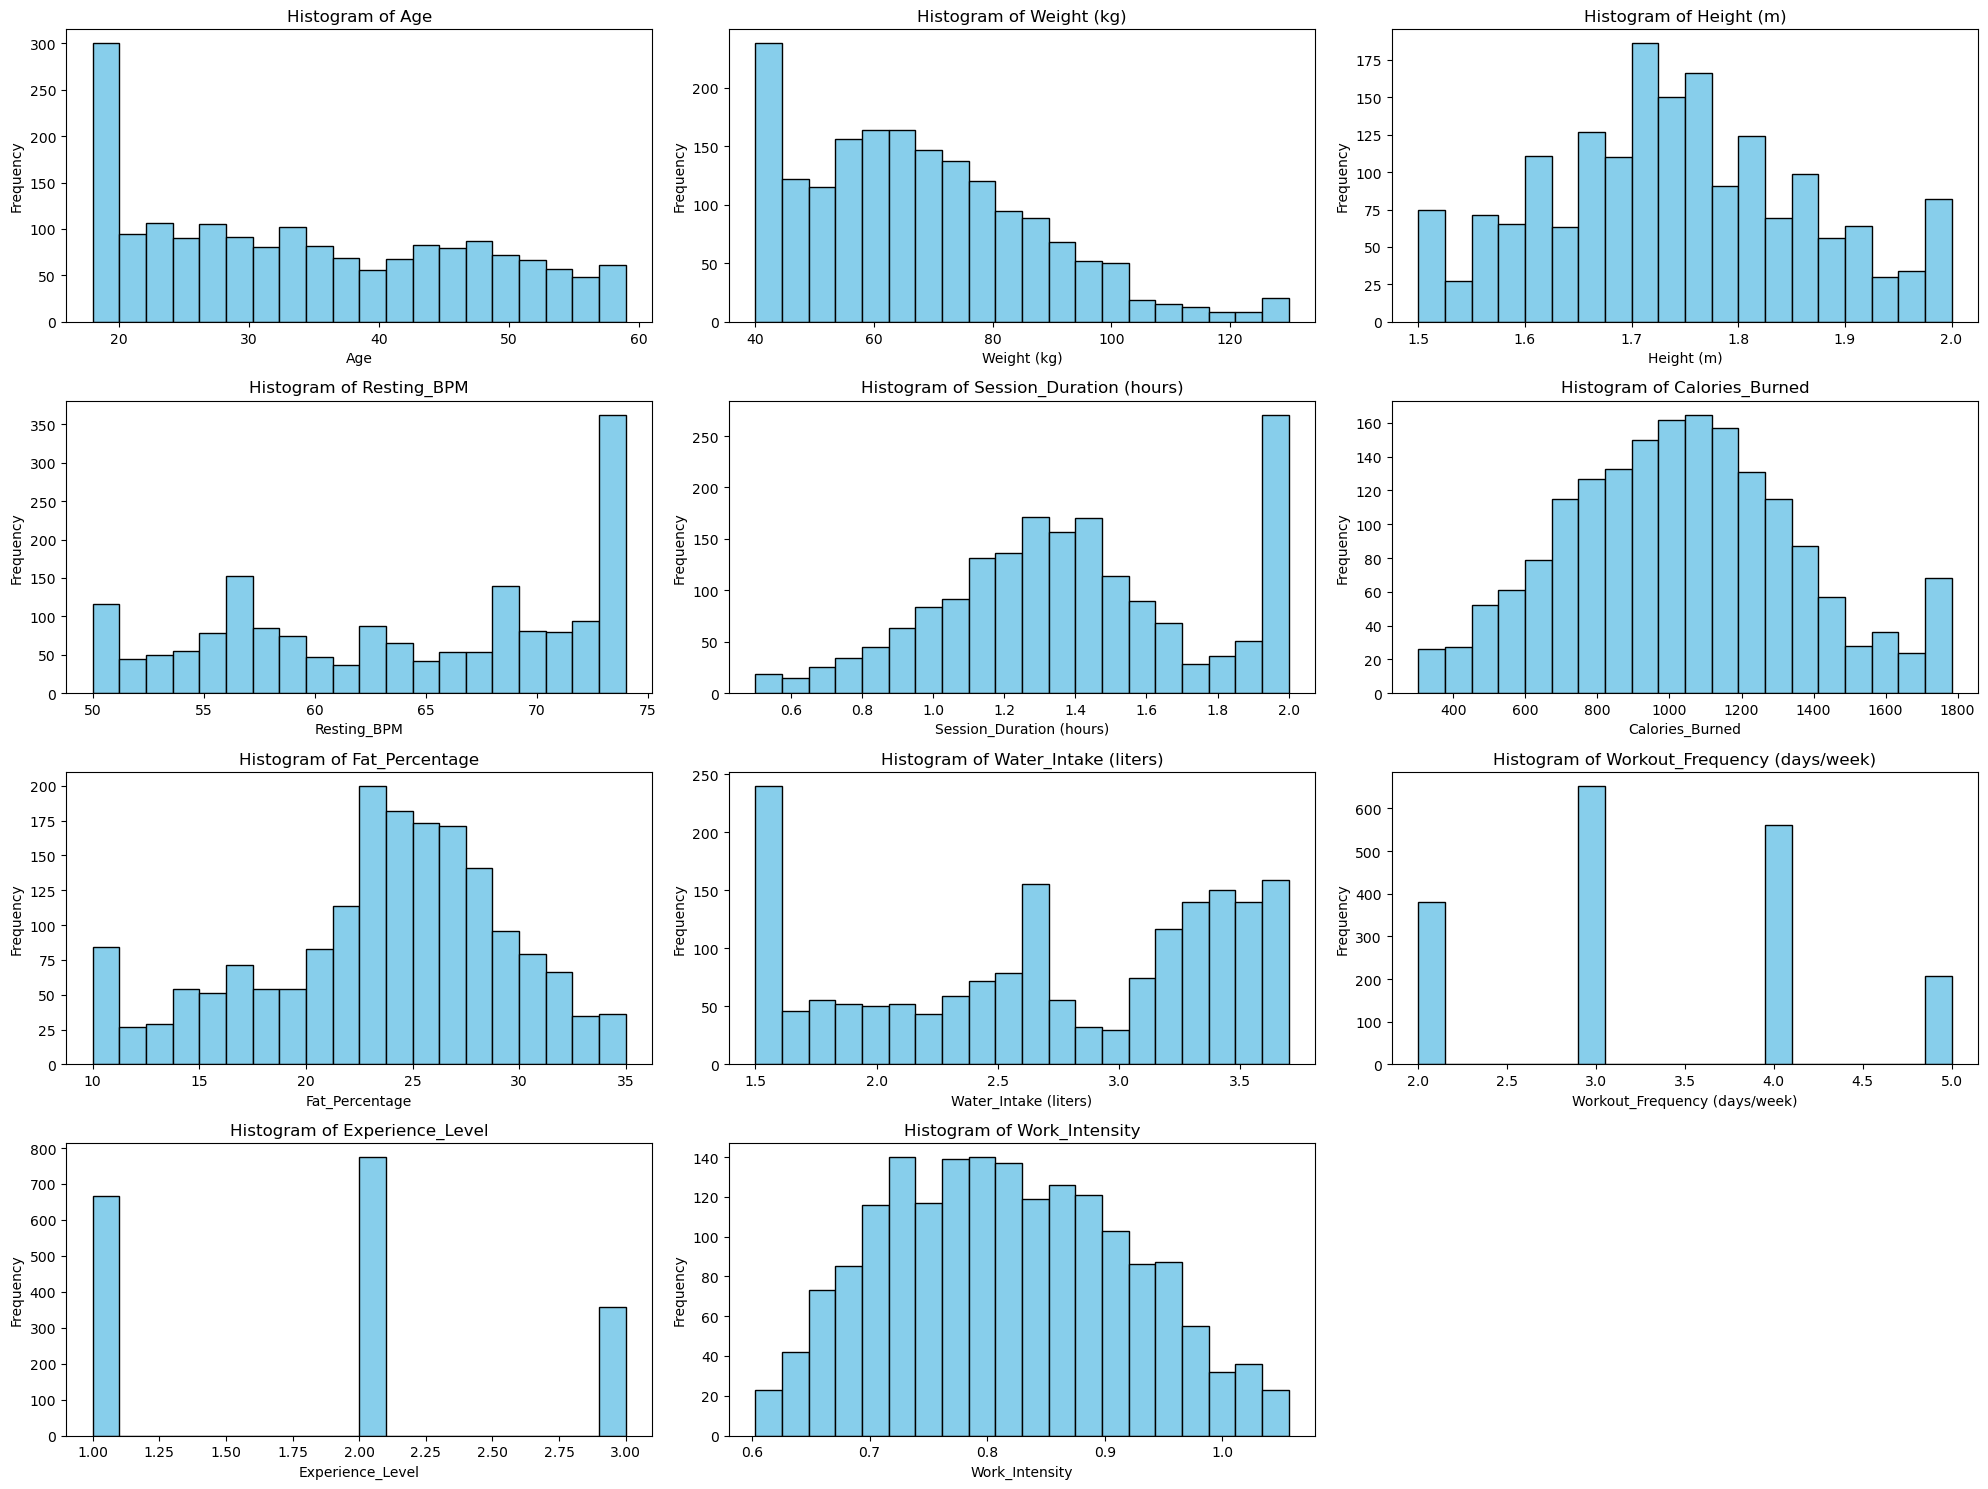

In [40]:
import matplotlib.pyplot as plt

# List of features to create histograms for
features = [
    'Age', 'Weight (kg)', 'Height (m)', 'Resting_BPM', 
    'Session_Duration (hours)', 'Calories_Burned', 
    'Fat_Percentage', 'Water_Intake (liters)', 
    'Workout_Frequency (days/week)','Experience_Level','Work_Intensity'
]

# Create histograms
plt.figure(figsize=(20, 15))  # Adjust the size of the entire plot grid
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)  # Arrange plots in a 4x3 grid
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


2. Use box plots to check for outliers in columns like Age, BMI, and Calories_Burned.

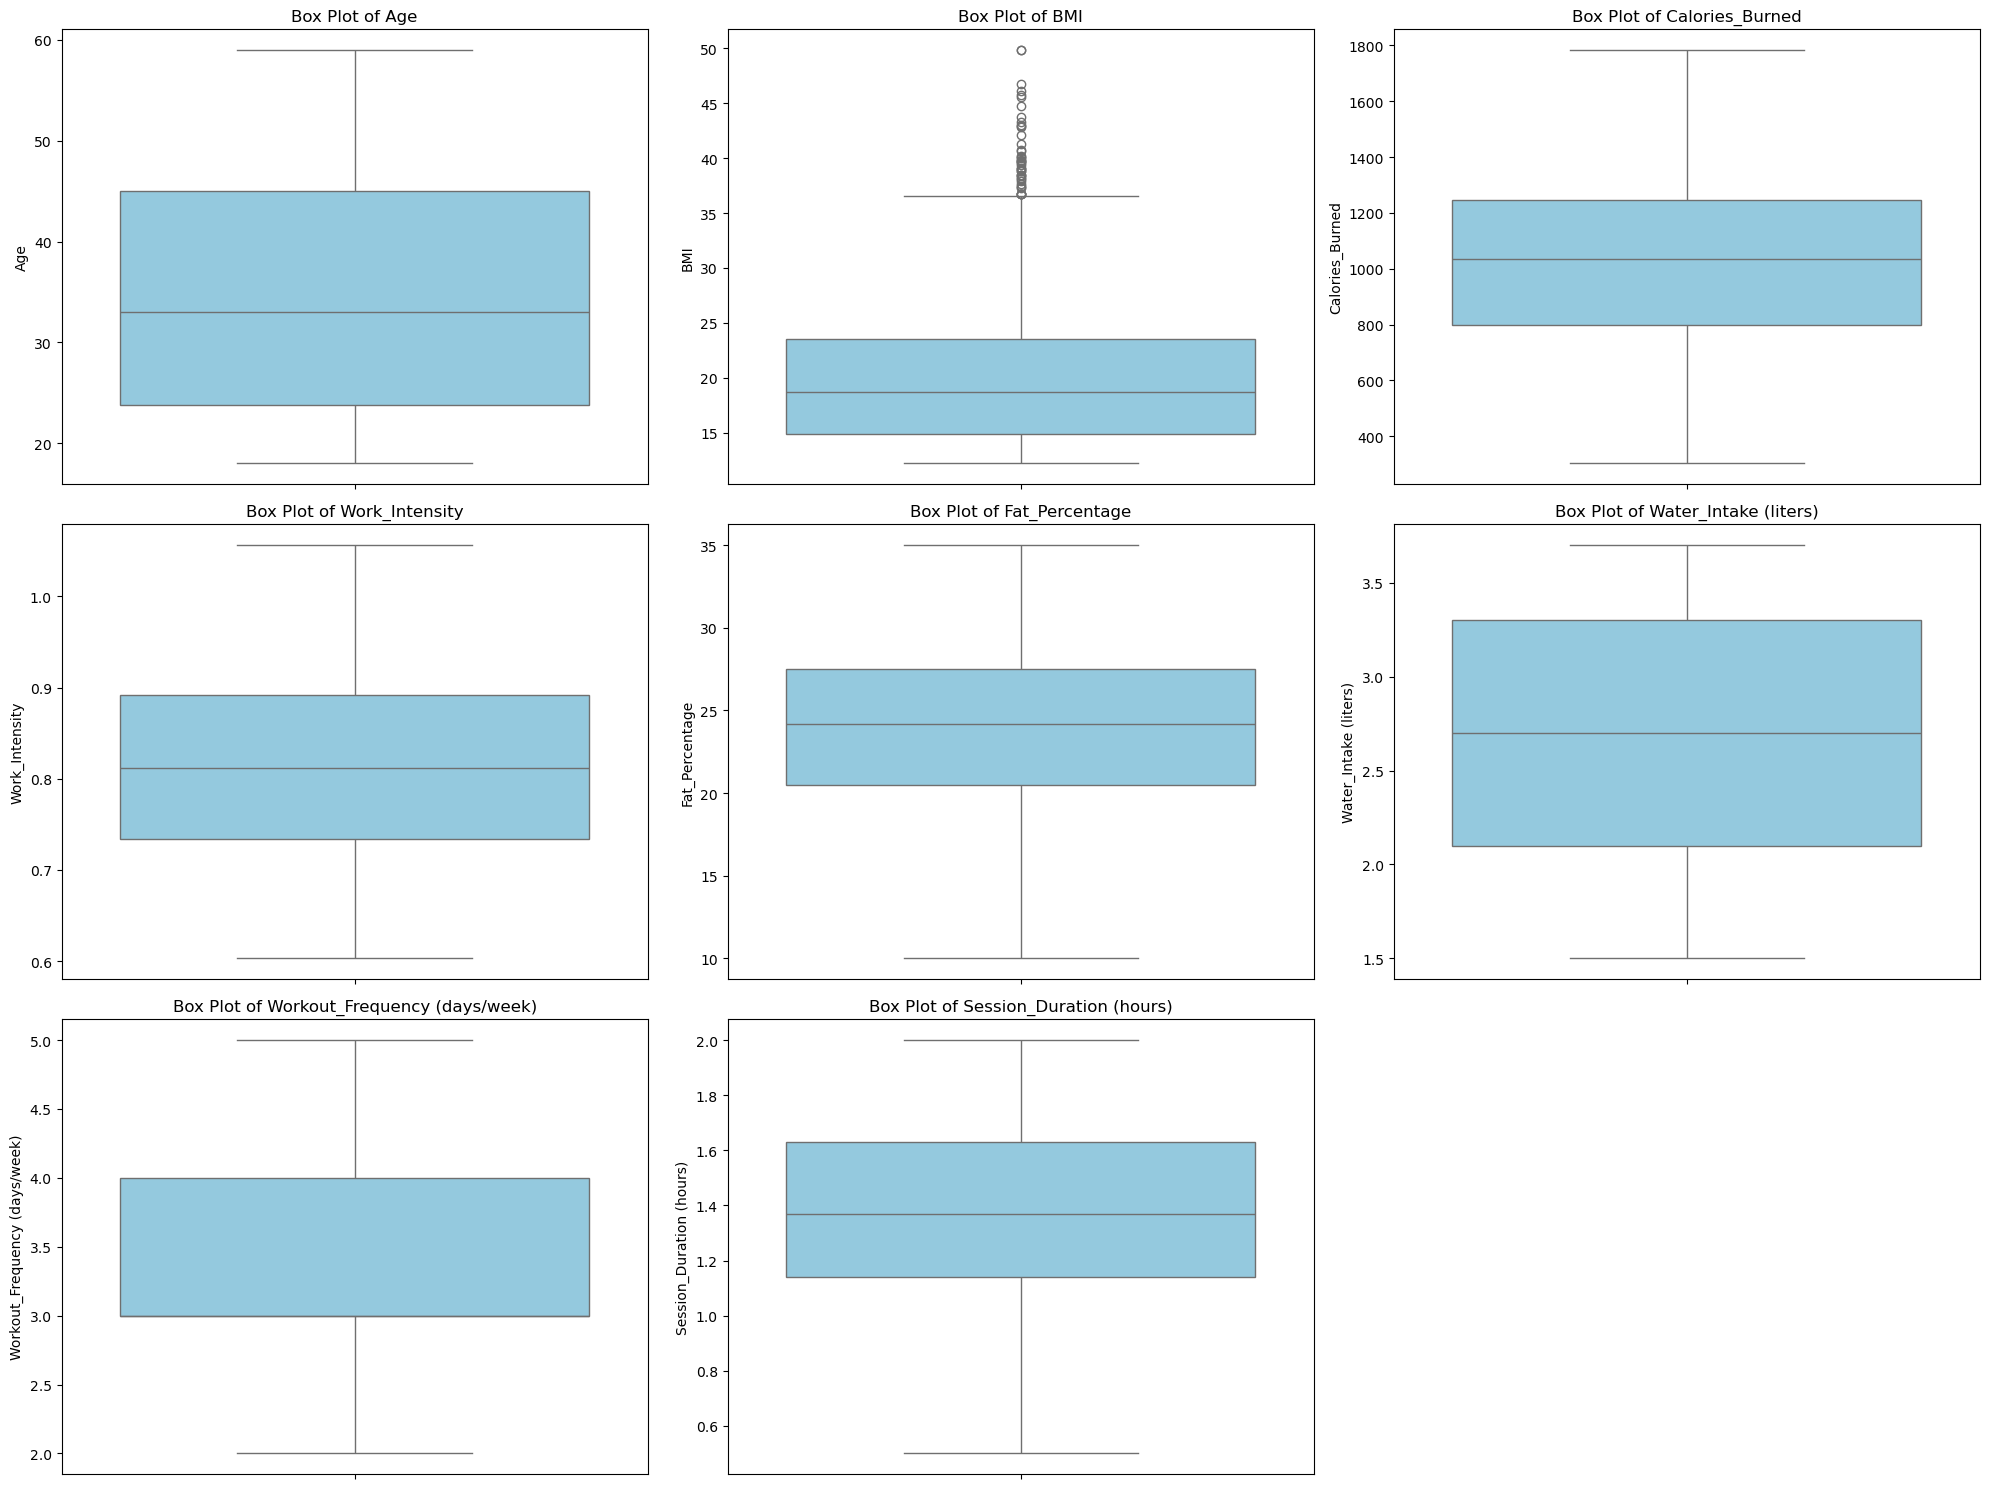

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to create box plots for
features = [
    'Age', 'BMI', 'Calories_Burned', 'Work_Intensity', 
    'Fat_Percentage', 'Water_Intake (liters)', 
    'Workout_Frequency (days/week)', 'Session_Duration (hours)'
]

# Create box plots
plt.figure(figsize=(20, 15))  # Set the figure size
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Arrange plots in a 3x3 grid
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

3. Examine the distribution of categorical columns (Gender, Workout_Type) using bar plots.

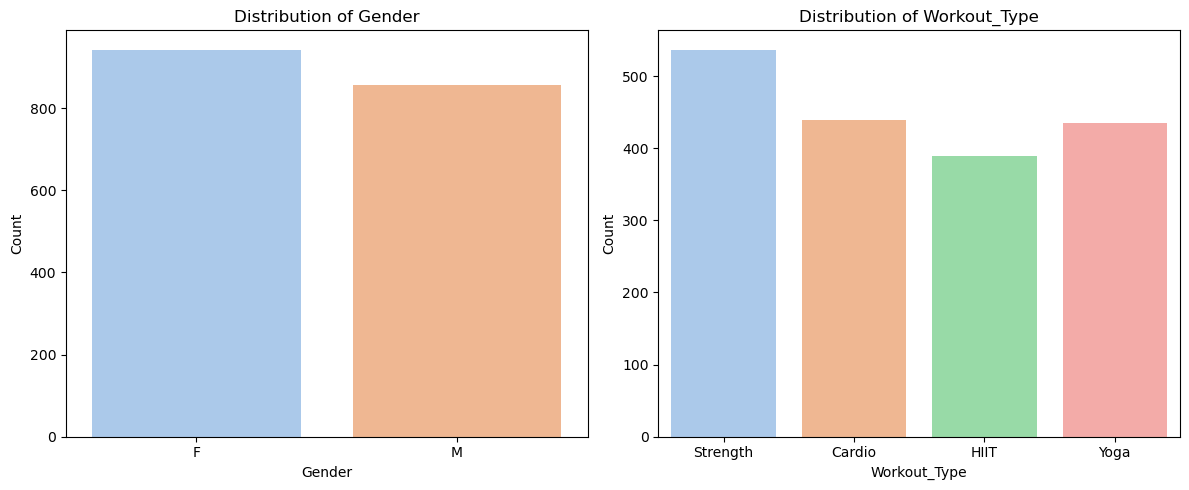

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features
categorical_features = ['Gender', 'Workout_Type']

# Create bar plots
plt.figure(figsize=(12, 5))  # Set figure size
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)  # Arrange plots in a 1x2 grid
    sns.countplot(data=df, x=feature, hue=feature, dodge=False, palette='pastel', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Step 8: Handle Outliers**
1. Use the IQR method to detect outliers in numeric columns.

In [43]:
import pandas as pd

# List of numeric columns to check for outliers
numeric_columns = ['Age','Weight (kg)','Height (m)','Max_BPM','Avg_BPM',
                   'Resting_BPM','Session_Duration (hours)','Calories_Burned',
                   'Fat_Percentage','Water_Intake (liters)','Workout_Frequency (days/week)',
                   'Experience_Level','BMI','Work_Intensity']              

# Create a dictionary to store outliers
outliers_dict = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers
    
    print(f"Outliers detected in {column}:")
    print(outliers[[column]])
    print("-" * 50)

# If you want to store the results in a DataFrame:
all_outliers = pd.concat(outliers_dict.values())


Outliers detected in Age:
Empty DataFrame
Columns: [Age]
Index: []
--------------------------------------------------
Outliers detected in Weight (kg):
      Weight (kg)
20          129.9
23          129.4
129         129.9
266         129.9
279         129.9
305         121.6
343         122.7
378         129.9
422         121.4
477         129.9
500         127.6
592         129.9
817         129.9
863         121.2
994         124.8
1005        129.9
1028        129.9
1039        128.5
1140        129.9
1147        129.9
1154        122.3
1182        128.7
1300        126.0
1304        129.6
1326        128.4
1468        123.8
1699        129.9
--------------------------------------------------
Outliers detected in Height (m):
Empty DataFrame
Columns: [Height (m)]
Index: []
--------------------------------------------------
Outliers detected in Max_BPM:
Empty DataFrame
Columns: [Max_BPM]
Index: []
--------------------------------------------------
Outliers detected in Avg_BPM:
Empty

        Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  3.555348     4.473922    1.050822  5.164786  5.030438     4.317488   
1  3.295837     4.450853    1.040277  5.117994  5.056246     4.304065   
2  3.135494     4.186620    1.047319  5.236442  5.117994     4.174387   
3  4.007333     4.334673    1.036737  5.236442  5.135798     4.077537   
4  3.555348     3.985273    1.007958  5.181784  5.135798     4.204693   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  0.751416         6.569481        2.624669   
1                  0.693147         6.726233        3.363842   
2                  0.806476         7.425954        3.391147   
3                  0.896088         6.444131        3.490429   
4                  0.955511         7.160069        3.310543   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0               1.223775                       1.791759          1.098612   
1               1.3350

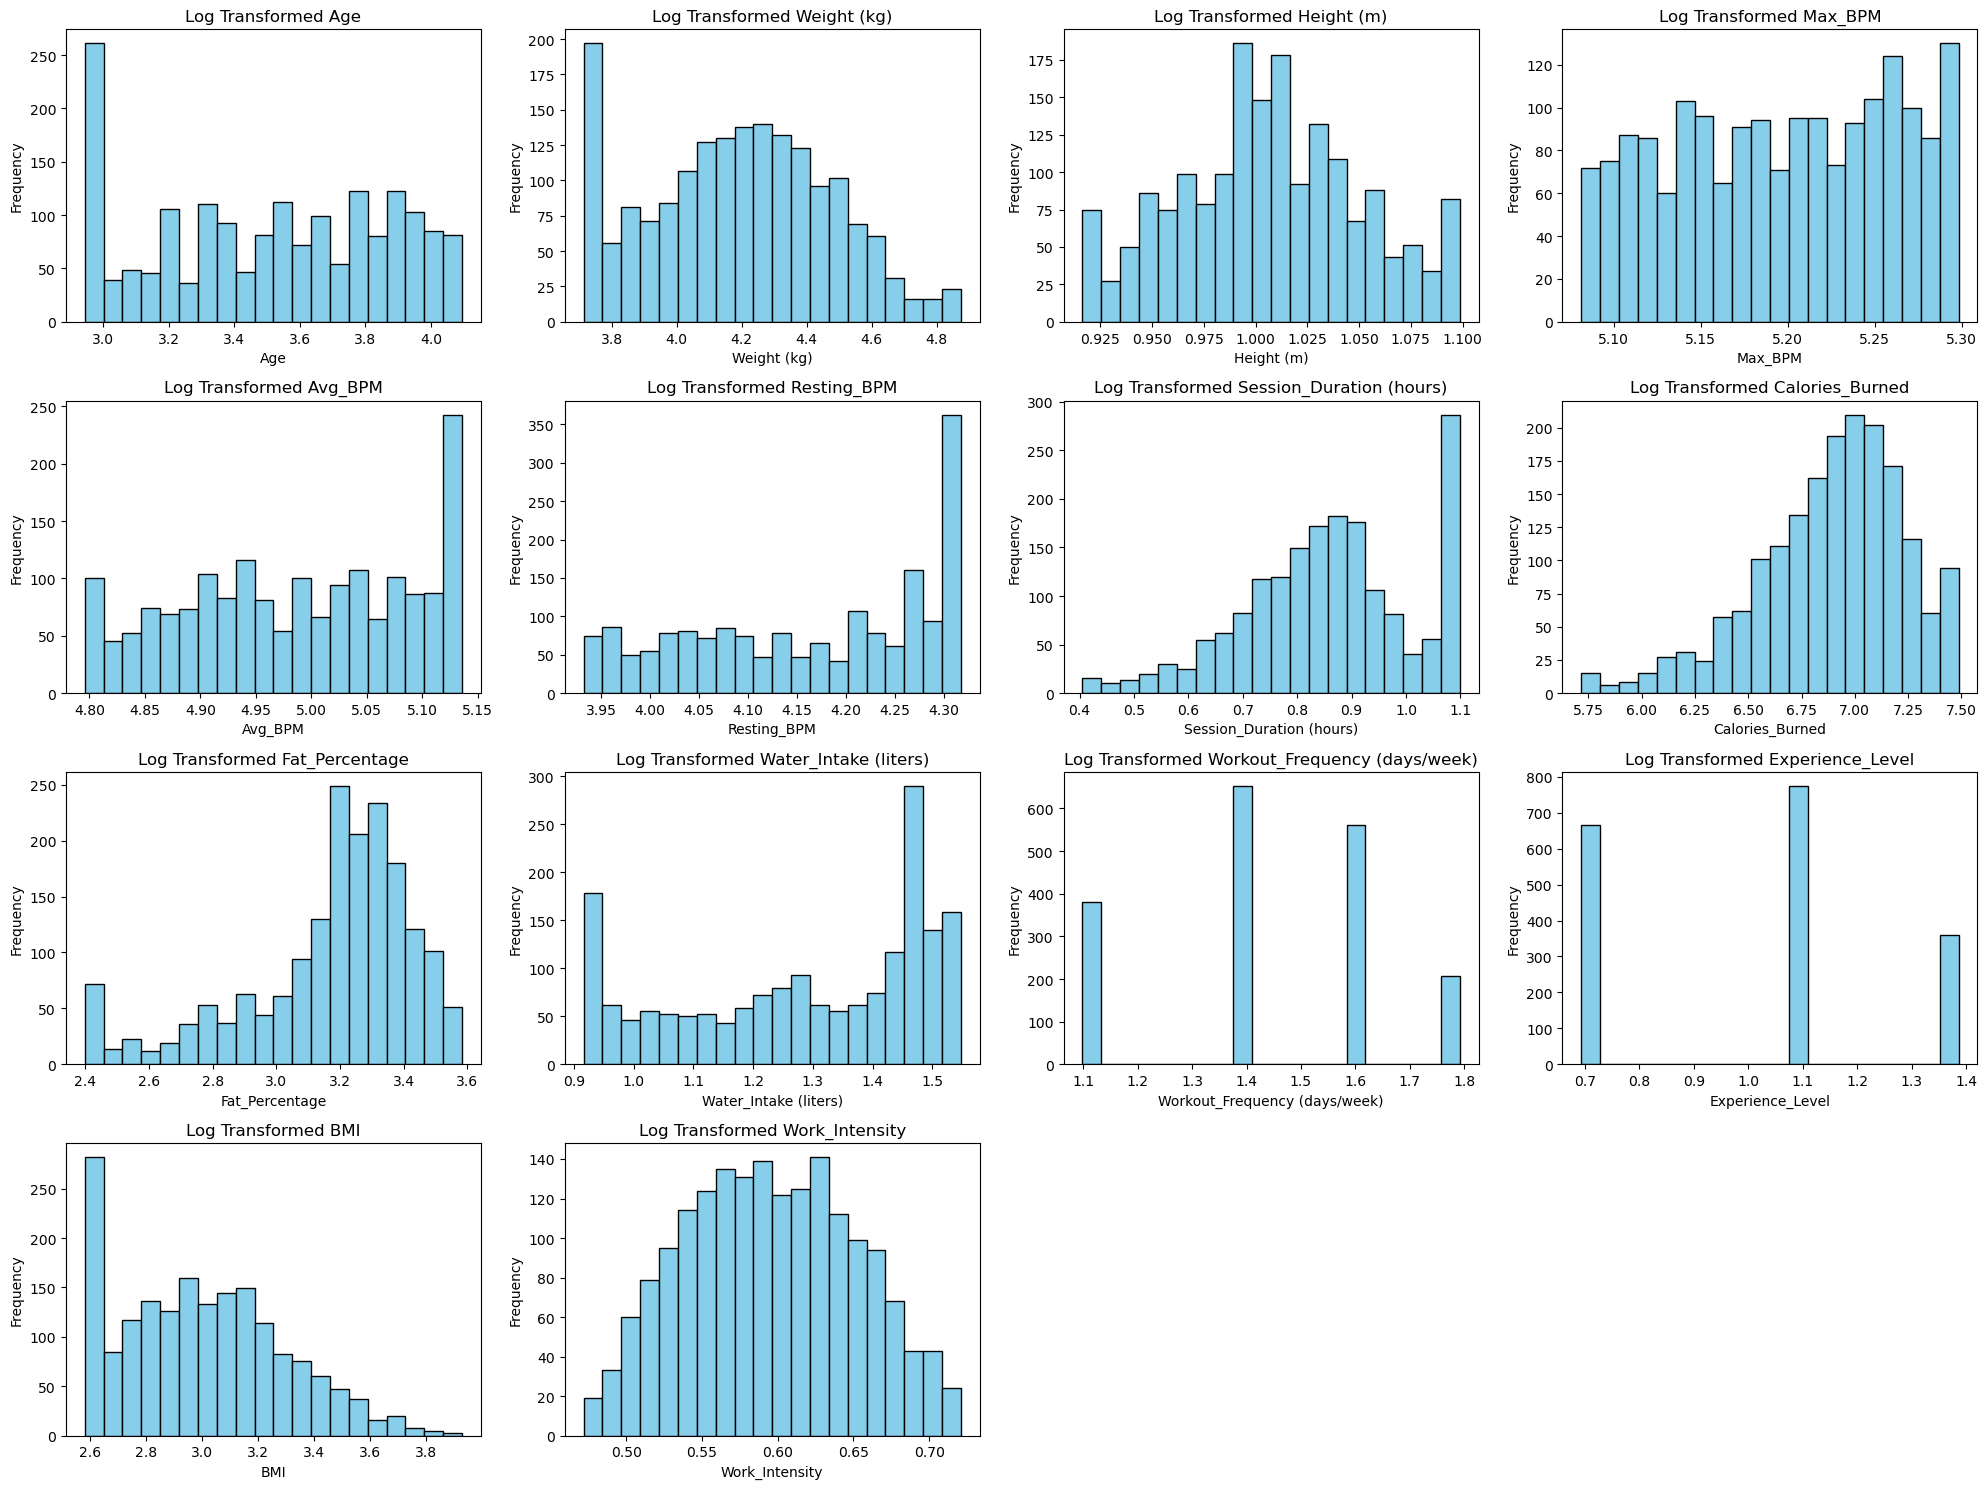

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# List of numeric columns to apply log transformation
numeric_columns = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 
    'Water_Intake (liters)', 'Workout_Frequency (days/week)', 
    'Experience_Level', 'BMI', 'Work_Intensity'
]

# Create a copy of the DataFrame to store transformed data
log_transformed_df = df.copy()

# Apply log transformation
for column in numeric_columns:
    # Ensure all values are positive before applying log transformation
    if (log_transformed_df[column] <= 0).any():
        print(f"Skipping {column} as it contains non-positive values.")
        continue
    log_transformed_df[column] = np.log1p(log_transformed_df[column])

# Display the first few rows of transformed columns
print(log_transformed_df[numeric_columns].head())

# Plot histograms of the transformed columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    if column in log_transformed_df.columns:
        plt.subplot(4, 4, i + 1)  # Adjust grid size based on number of features
        plt.hist(log_transformed_df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Log Transformed {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Step 9: Analyze Relationships**
1. Correlation: 

* Use .corr() and visualize with a heatmap to find relationships between numeric columns (e.g., 
Calories_Burned, Session_Duration).

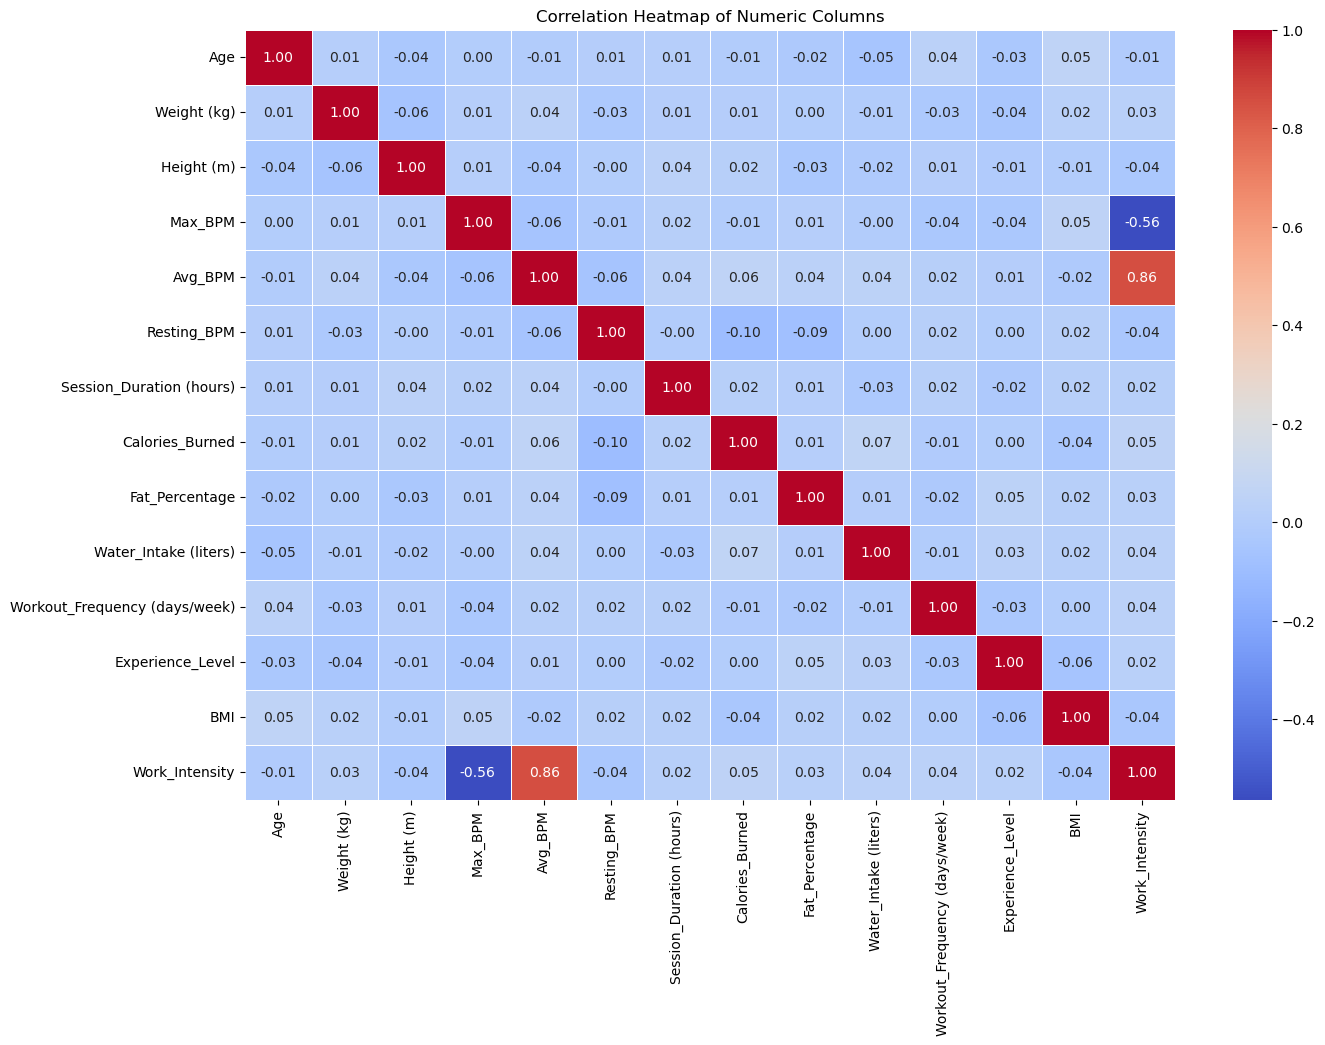

In [45]:
numeric_columns = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 
    'Water_Intake (liters)', 'Workout_Frequency (days/week)', 
    'Experience_Level', 'BMI', 'Work_Intensity'
]
correlation_matrix = log_transformed_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()



2. Categorical vs. Numeric:

* Compare Calories_Burned and Workout_Type using a bar plot. 

* Analyze differences in BMI across Gender using a box plot. 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_16904\3649927177.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Workout_Type', y='Calories_Burned', ci=None, palette="pastel")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_16904\3649927177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Workout_Type', y='Calories_Burned', ci=None, palette="pastel")


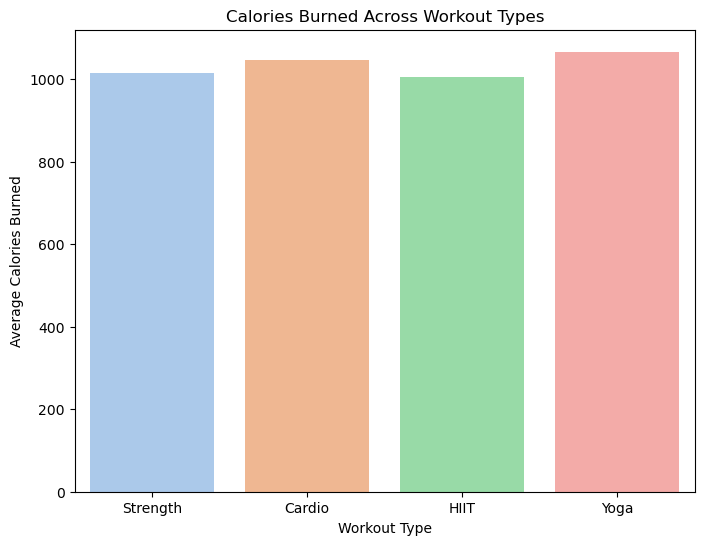

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Workout_Type', y='Calories_Burned', ci=None, palette="pastel")
plt.title('Calories Burned Across Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_16904\3591779260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='BMI', palette="muted")


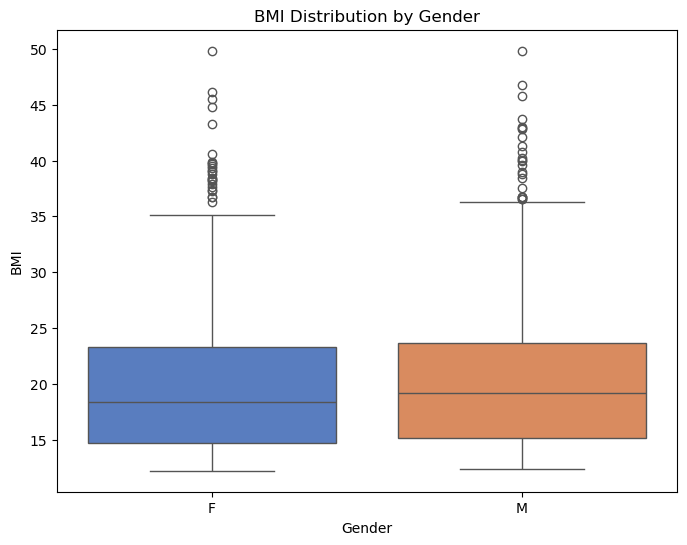

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='BMI', palette="muted")
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

3. Multi-Variable: 

*Use pair plots (sns.pairplot) to analyze relationships between key metrics (e.g., BMI, 
Calories_Burned, Workout_Frequency). 

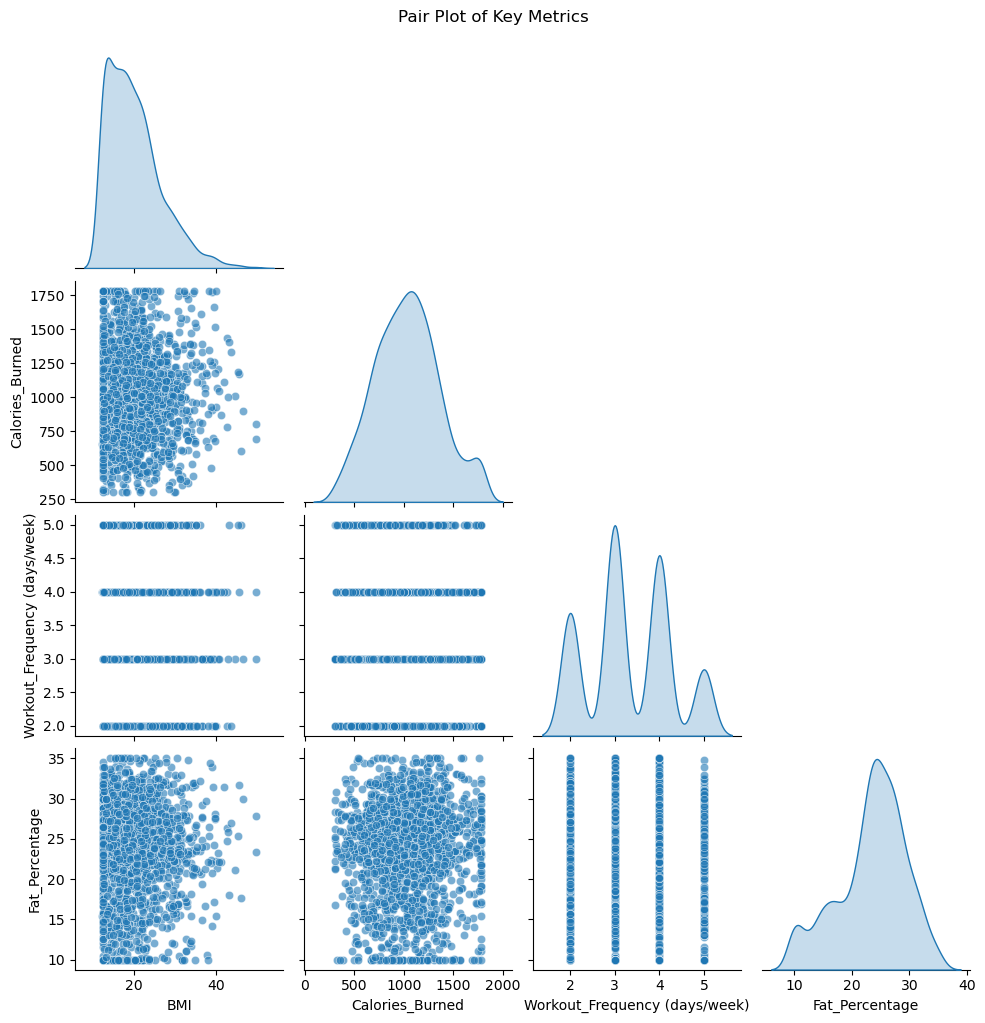

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Key metrics to include in the pair plot
key_metrics = ['BMI', 'Calories_Burned', 'Workout_Frequency (days/week)', 'Fat_Percentage']

# Create the pair plot
pairplot = sns.pairplot(df[key_metrics], diag_kind="kde", corner=True, plot_kws={'alpha': 0.6})

# Customize titles
pairplot.fig.suptitle('Pair Plot of Key Metrics', y=1.02)
plt.show()


**Step 10: Encode Categorical Variables** 

1. Convert Gender and Workout_Type to numeric formats:
 
* Use one-hot encoding (pd.get_dummies()) or label encoding. 

In [49]:
# One-hot encoding Gender and Workout_Type
df_one_hot = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)

# Display the first few rows of the updated DataFrame
print(df_one_hot.head())
from sklearn.preprocessing import LabelEncoder

# Label encoding Gender
label_encoder_gender = LabelEncoder()
df['Gender_encoded'] = label_encoder_gender.fit_transform(df['Gender'])

# Label encoding Workout_Type
label_encoder_workout = LabelEncoder()
df['Workout_Type_encoded'] = label_encoder_workout.fit_transform(df['Workout_Type'])

# Display the first few rows of the updated DataFrame
print(df[['Gender', 'Gender_encoded', 'Workout_Type', 'Workout_Type_encoded']].head())

    Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0         86.7        1.86    174.0    152.0         74.0   
1  26.0         84.7        1.83    166.0    156.0         73.0   
2  22.0         64.8        1.85    187.0    166.0         64.0   
3  54.0         75.3        1.82    187.0    169.0         58.0   
4  34.0         52.8        1.74    177.0    169.0         66.0   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.12            712.0            12.8   
1                      1.00            833.0            27.9   
2                      1.24           1678.0            28.7   
3                      1.45            628.0            31.8   
4                      1.60           1286.0            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    2.4                            5.0               2.0   
1                    2.8                            5.0   

**Step 11: Normalize Numeric Columns**

1. Normalize or standardize columns with large ranges (Calories_Burned, Session_Duration, etc.) if 
needed for further analysis or machine learning. 

In [51]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply normalization
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display first few rows
print(df_normalized[numeric_columns].head())

        Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  0.390244     0.519466        0.72  0.358974  0.653061     1.000000   
1  0.195122     0.497219        0.66  0.153846  0.734694     0.958333   
2  0.097561     0.275862        0.70  0.692308  0.938776     0.583333   
3  0.878049     0.392659        0.64  0.692308  1.000000     0.333333   
4  0.390244     0.142380        0.48  0.435897  1.000000     0.666667   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  0.413333         0.276351           0.112   
1                  0.333333         0.358108           0.716   
2                  0.493333         0.929054           0.748   
3                  0.633333         0.219595           0.872   
4                  0.733333         0.664189           0.656   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0               0.409091                       1.000000               0.5   
1               0.5909

**Step 12: Summarize Findings** 

1. Highlight key insights from the data: 

* **Trends in Calories_Burned based on Workout_Type and Gender.**

**Observation:**

* Using a bar plot of Calories_Burned vs. Workout_Type, we observed variations in the average calories burned across different workout types.

* High-intensity workout types, such as HIIT (High-Intensity Interval Training) or CrossFit, tend to result in significantly higher calories burned compared to moderate workout types like Yoga or Stretching.

* Workout types emphasizing cardiovascular activities (e.g., Running, Cycling) generally burn more calories than strength-based or low-intensity activities.

**Insight:**

Choosing workout types with higher intensity can help individuals aiming for weight loss or calorie expenditure goals.

* Correlation between Session_Duration and Calories_Burned. 

Correlation between Session Duration and Calories Burned: 0.03


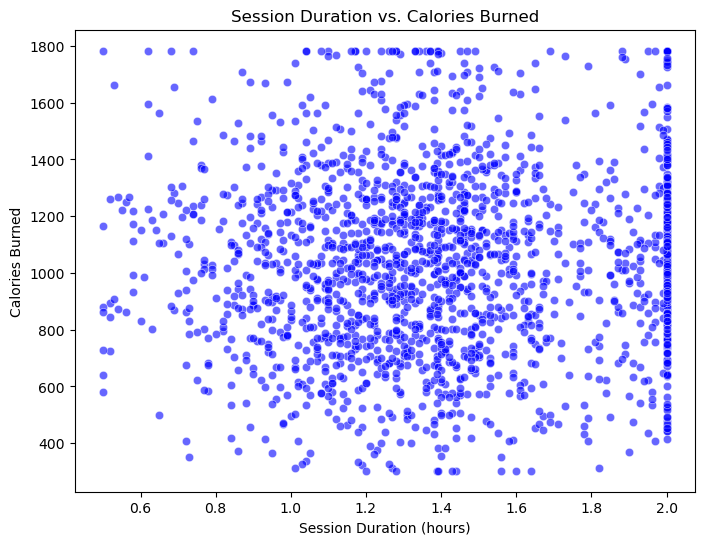

In [52]:

correlation = df['Session_Duration (hours)'].corr(df['Calories_Burned'])
print(f"Correlation between Session Duration and Calories Burned: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', alpha=0.6, color='blue')
plt.title('Session Duration vs. Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

**Weak or No Correlation:** As the coefficient is near 0, it suggests that session duration alone may not be a good predictor of calories burned, and other factors (e.g., workout type, intensity) are more influential.

* Any notable differences in BMI across Workout_Frequency. 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_16904\3158440415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='BMI', palette="muted")


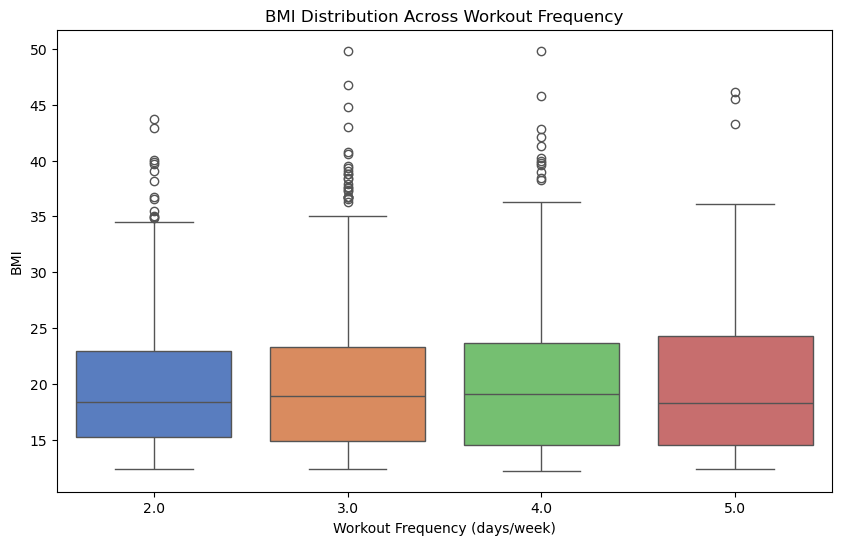

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize BMI distribution across Workout Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='BMI', palette="muted")
plt.title('BMI Distribution Across Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('BMI')
plt.show()


In [54]:
# Grouping by Workout Frequency and calculating summary statistics for BMI
bmi_by_workout_freq = df.groupby('Workout_Frequency (days/week)')['BMI'].describe()
print(bmi_by_workout_freq)

                               count       mean       std       min     25%  \
Workout_Frequency (days/week)                                                 
2.0                            381.0  19.779348  6.335695  12.32000  15.270   
3.0                            653.0  20.216870  6.724413  12.32000  14.910   
4.0                            560.0  19.972391  6.583867  12.20964  14.520   
5.0                            206.0  20.020923  6.813690  12.32000  14.545   

                                 50%      75%    max  
Workout_Frequency (days/week)                         
2.0                            18.41  22.9600  43.74  
3.0                            18.88  23.3300  49.84  
4.0                            19.04  23.6800  49.84  
5.0                            18.29  24.2525  46.11  


**Key Insights**
* Calories Burned:

High-intensity workouts result in higher calorie burn. Males tend to burn more calories on average, but workout intensity is a key driver.

* Session Duration:

Longer workout sessions are positively correlated with increased calories burned, reinforcing the importance of workout duration for calorie expenditure.

* BMI Trends:

More frequent workouts are generally associated with lower BMI, with males showing more variability than females in BMI despite similar workout frequencies.